<a href="https://colab.research.google.com/github/PaulaEsteban2000/CSE151A_UrbanAnimals/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import math

In [2]:
df = pd.read_csv('BR_Animal_Control_Calls.csv')
print(df.shape)
[(col, df[col].isna().sum()) for col in df.columns]

(52585, 16)


[('file_number', 0),
 ('incident_date', 0),
 ('request_type', 32850),
 ('location', 0),
 ('municipality', 0),
 ('zip_code', 28400),
 ('species', 21),
 ('breed', 815),
 ('sex', 12348),
 ('size', 1270),
 ('age', 19679),
 ('condition', 2202),
 ('temperment', 1599),
 ('disposition', 7),
 ('lat', 0),
 ('long', 0)]

In [3]:
columns = [
    "incident_date",
    "species",
    "breed",
    "sex",
    "size",
    "condition",
    "lat",
    "long"
]
df = df[columns]

In [5]:
df = df.replace("UNKNOWN", np.nan)
df = df.dropna()
[(col, df[col].isna().sum()) for col in ["species", "breed", "sex", "size", "condition"]]
[df[col].value_counts() for col in ["species", "breed", "sex", "size", "condition"]]
df.shape

(36600, 8)

In [15]:
!pip3 install altair

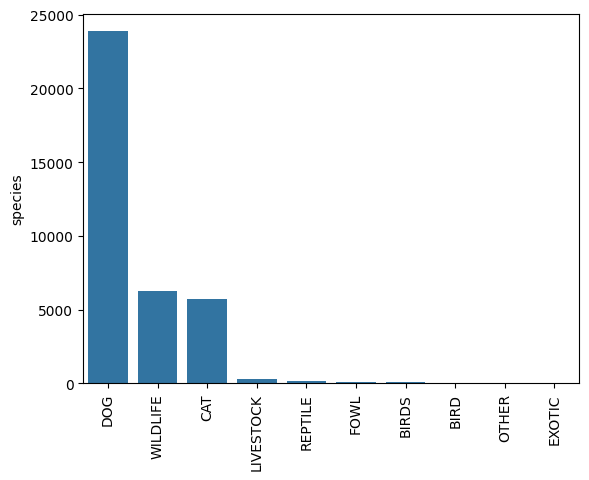

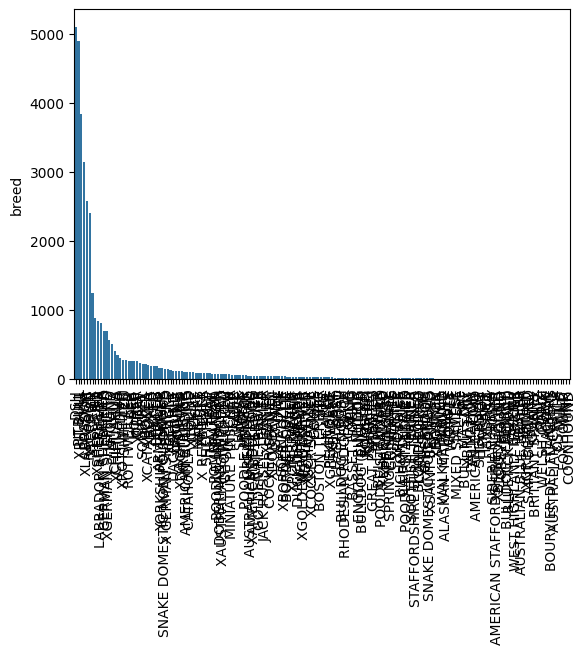

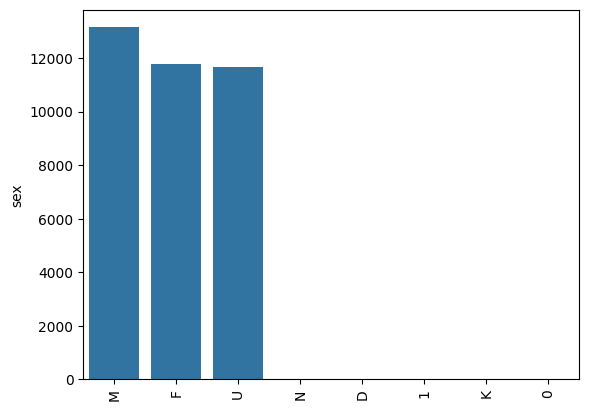

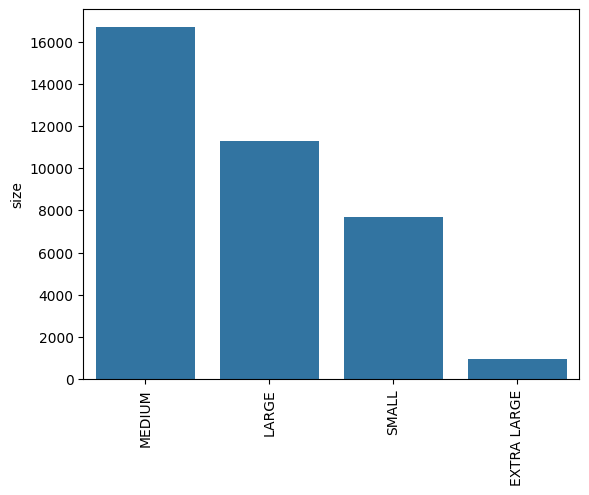

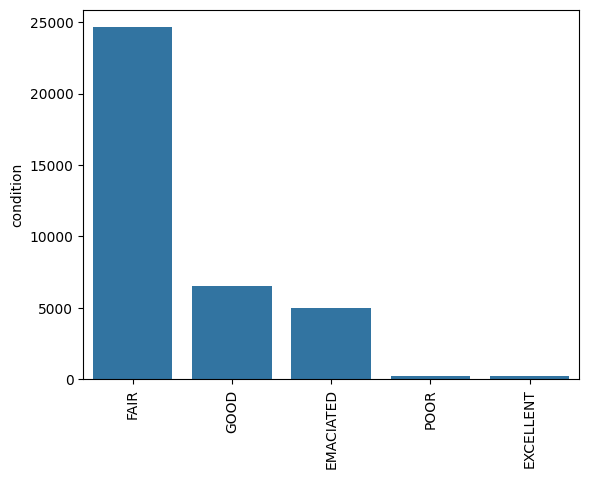

In [16]:
for i in ["species", "breed", "sex", "size", "condition"]:
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.tick_params(axis='x', labelrotation=90)
    sns.barplot(df[i].value_counts())

In [6]:
breeds = df.breed.apply(lambda x: x[1:].strip() if x[0]=="X" else x.strip()).unique()
print(len(breeds))
breeds

146


array(['PITBULL', 'POSSUM', 'GERMAN SHEPHERD', 'YORKSHIRE TERRIER',
       'DOBERMAN PINSCHER', 'DMH', 'DSH', 'OTHER', 'LABRADOR', 'PIT BULL',
       'SHIH TZU', 'RACCOON', 'TERRIER', 'SQUIRREL', 'LABRADOR RETRIEVER',
       'PIT', 'ROTTWEILLER', 'DLH', 'CHIHUAHUA', 'HAWK', 'BAT', 'HUSKY',
       'AUSTRALIAN SHEPHERD', 'HOUND', 'CATAHOULA HOUND', 'BORDER COLLIE',
       'TURTLE', 'SIAMESE', 'POINTER', 'CHOW', 'SHEPHERD', 'BEAGLE',
       'ARMADILLO', 'BEAVER', 'SNAKE DOMESTIC NON POISONOUS', 'HORSE',
       'CURR', 'BOXER', 'ROTTWEILER', 'HEALER', 'POMERANIAN', 'RABBIT',
       'DACHSHUND', 'ROOSTER', 'AMERICAN BULLDOG', 'RETRIEVER', 'COLLIE',
       'JACK RUSSEL TERRIER', 'BLUETICK HOUND', 'CATAHOULA', 'PUG',
       'MIXED', 'PEKINGESE', 'AKITA', 'ALASKAN  MALAMUTE',
       'POODLE MIN/TOY', 'BULLDOG ENGLISH', 'POODLE', 'MALTESE',
       'SCHNAUZER', 'GOAT', 'GREAT DANE', 'CHOW CHOW', 'SHEEPDOG',
       'SAINT BERNARD', 'SKUNK', 'MINIATURE PINSCHER', 'SCOTTISH TERRIER',
       'MULE',

In [7]:
df.head()

,incident_date,species,breed,sex,size,condition,lat,long
0,2016-12-27T00:00:00Z,DOG,PITBULL,F,LARGE,FAIR,30.494640,-91.156160
1,2016-12-28T00:00:00Z,WILDLIFE,POSSUM,U,LARGE,FAIR,30.431417,-91.141070
2,2016-12-28T00:00:00Z,DOG,PITBULL,M,LARGE,EMACIATED,30.648540,-91.156770
3,2016-12-28T00:00:00Z,DOG,GERMAN SHEPHERD,F,MEDIUM,EMACIATED,30.476015,-91.168460
4,2016-12-28T00:00:00Z,DOG,YORKSHIRE TERRIER,F,SMALL,EMACIATED,30.429104,-91.185036


In [8]:
df = df.assign(breed=df.breed.apply(lambda x: x[1:].strip() if x[0]=="X" else x.strip()))


In [9]:
# 'Husky' apparently doesn't only refer to the Siberian Husky, so left the two as separate
# Assumes that 'BOSTON' only refers to Boston Terriers

fix_repeat = df.assign(breed=df.breed.apply(lambda x: "PITBULL" if x=="PIT BULL" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "LABRADOR RETRIEVER" if x=="LABRADOR" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "PITBULL" if x=="PIT" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "ROTTWEILER" if x=="ROTTWEILLER" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "HEELER" if x=="HEALER" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "CATAHOULA HOUND" if x=="CATAHOULA" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "ENGLISH BULLDOG" if x=="BULLDOG ENGLISH" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "DOBERMAN PINSCHER" if x=="DOBERMAN" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "BOSTON TERRIER" if x=="BOSTON" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "POODLE MIN/TOY" if x=="POODLE (MIN/TOY)" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "ENGLISH BULLDOG" if x=="BULLDOG (ENGLISH)" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "PITBULL" if x=="pit" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "POODLE STANDARD" if x=="POODLE -STANDARD" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "FRENCH BULLDOG" if x=="BULLDOG (FRENCH)" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "BRITTANY" if x=="BRITTANY SPANIEL" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "HEELER" if x=="AUSTRALIAN BLUE HEALER" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "CHOW CHOW" if x=="CHOW" else x))
fix_repeat = fix_repeat.assign(breed=fix_repeat.breed.apply(lambda x: "SHAR PEI" if x=="SHARPEI" else x))

In [10]:
len(fix_repeat.breed.unique())

130

In [11]:
# Based on:
# https://www.akc.org/public-education/resources/general-tips-information/dog-breeds-sorted-groups/
#
# Additional Notes:
# 'YORKSHIRE TERRIER' is listed as only Toy, but google search suggests that you could consider it both (for now just left as Toy)
# 'SHEPHERD' is vague, some shepherd dogs are listed as working and some as herding (for now left as herding)
# 'CURR' or 'CUR' apparently refers to a couple different breeds (for now left as Hound as AKC places Mountain Cur as a Hound)
#
# Assumes 'TERRIER' is just any kind of Terrier
# Assumes 'HOUND' is just any kind of Hound
# Assumes 'Pointer' is any kind of pointer dog which is classified as sporting
# Assumes that 'RETRIEVER' is just any kind of Retriever dog
# Assumes that 'POODLE' and 'POODLE STANDARD' are the same kind of poodle
# Assumes that 'SCHNAUZER' is a standard schnauzer
# Assumes that 'SHEEPDOG' is just any kind of sheepdog
# Assumes that 'SPANIEL' is only Sporting dogs, AKC includes some other spanials in other categories
# Assumes that 'BASSET' is just a basset hound
# Assumes that 'SETTER' is just any kind of setter dog
# Assumes that 'SHELTIE' = Shetland Sheepdog
# Assumes that 'GREYHOUND' is not Italian Greyhound
# Assumes that 'WALKER HOUND' = Treeing Walker Coonhound
# Assumes that 'COONHOUND' is any of the coonhounds listed by AKC as a hound
#
# 'CATAHOULA HOUND' is also called Catahoula Leopard Dog
# 'BLUETICK HOUND' is also called Bluetick Coonhound
# Might've messed up 'HEALER' since there's a dog breed called Lancashire Heeler but heelers can also refer to
#         Australian Cattle Dogs; both are Herding dogs so for categorizing it's fine
#
# not listed or classified by AKC:
# 'JACK RUSSEL TERRIER' -> https://www.dogbreedinfo.com/jackrussellterrier.htm
# 'AMERICAN BULLDOG' -> https://www.redstonevet.com/services/dogs/breeds/american-bulldog#:~:text=The%20American%20Bulldog%20was%20first,have%20a%20high%20energy%20level.
# 'ENGLISH BULLDOG' -> https://www.dogbreedinfo.com/bulldog.htm
# 'BOURVIER DES FLANDERS' -> https://www.dogbreedinfo.com/bouvierdesflandres.htm

Herding = ['GERMAN SHEPHERD', 'AUSTRALIAN SHEPHERD', 'CATAHOULA HOUND', 'BORDER COLLIE', 'SHEPHERD', 'HEELER', 'COLLIE',
           'SHEEPDOG', 'AUSTRALIAN CATTLE', 'BOURVIER DES FLANDERS', 'WELSH CORGI', 'SHELTIE']
Hound = ['HOUND', 'BEAGLE', 'CURR', 'DACHSHUND', 'BLUETICK HOUND', 'BLOODHOUND', 'WHIPPET', 'FOXHOUND', 'RHODESIAN RIDGEBACK',
         'BASSET HOUND', 'BASENJI', 'BASSET', 'GREYHOUND', 'WALKER HOUND', 'COONHOUND']
Toy = ['YORKSHIRE TERRIER', 'SHIH TZU', 'CHIHUAHUA', 'POMERANIAN', 'PUG', 'PEKINGESE', 'POODLE MIN/TOY', 'MALTESE',
       'MINIATURE PINSCHER']
Non_sporting = ['CHOW CHOW', 'ENGLISH BULLDOG', 'POODLE', 'SHAR PEI', 'LHASA APSO', 'POODLE STANDARD', 'DALMATION',
                'SPITZ', 'BICHONS FRISE', 'FRENCH BULLDOG', 'AMERICAN ESKIMO']
Sporting = ['LABRADOR RETRIEVER', 'POINTER', 'RETRIEVER', 'SPRINGER SPANIEL', 'COCKER SPANIEL', 'GOLDEN RETRIEVER',
            'SPANIEL', 'WEIMERANER', 'SETTER', 'BRITTANY']
Terrier = ['PITBULL', 'TERRIER', 'JACK RUSSEL TERRIER', 'SCOTTISH TERRIER', 'BOSTON TERRIER', 'CAIRN TERRIER',
           'BULL TERRIER', 'STAFFORDSHIRE BULL TERRIER', 'RAT TERRIER', 'WEST HIGHLAND TERRIER', 'AMERICAN STAFFORDSHIRE TERRIER']
Working = ['DOBERMAN PINSCHER', 'ROTTWEILER', 'HUSKY', 'BOXER', 'AMERICAN BULLDOG', 'AKITA', 'ALASKAN  MALAMUTE',
           'SCHNAUZER', 'GREAT DANE', 'SAINT BERNARD', 'MASTIFF', 'GREAT PYRENEES', 'CANE CORSO', 'SIBERIAN HUSKY',
           'BULL MASTIFF']
Other = ['POSSUM', 'DMH', 'DSH', 'OTHER', 'RACCOON', 'SQUIRREL', 'DLH', 'HAWK', 'BAT', 'TURTLE', 'SIAMESE',
         'ARMADILLO', 'BEAVER', 'SNAKE DOMESTIC NON POISONOUS', 'HORSE', 'RABBIT', 'ROOSTER', 'GOAT', 'SKUNK',
         'MULE', 'NUTRIA', 'PIG', 'DUCK DOMESTIC', 'SNAKE DOMESTIC POISONOUS', 'GOOSE', 'MINK', 'CHICKEN',
         'OWL', 'OSTRICH', 'CROW', 'GUINEA', 'IGUANA', 'PEACOCK', 'PARROT', 'DONKEY', 'GUINEA PIG', 'MIXED SIAMESE',
         'RAT', 'COYOTE', 'MANX', 'COW', 'LIZARD', 'SHEEP', 'FERRET', 'FISH', 'HAMSTER']

# TODO: Where should 'MIXED' be categorized?

In [12]:
# Left MIXED breed as is for now
categories = fix_repeat.copy()
categories['breed'].replace(Herding, 'HERDING', inplace=True)
categories['breed'].replace(Hound, 'HOUND', inplace=True)
categories['breed'].replace(Toy, 'TOY', inplace=True)
categories['breed'].replace(Non_sporting, 'NONSPORTING', inplace=True)
categories['breed'].replace(Sporting, 'SPORTING', inplace=True)
categories['breed'].replace(Terrier, 'TERRIER', inplace=True)
categories['breed'].replace(Working, 'WORKING', inplace=True)
categories['breed'].replace(Other, 'OTHER', inplace=True)
categories.breed.unique()

array(['TERRIER', 'OTHER', 'HERDING', 'TOY', 'WORKING', 'SPORTING',
       'HOUND', 'NONSPORTING', 'MIXED'], dtype=object)

In [13]:
categories

,incident_date,species,breed,sex,size,condition,lat,long
0,2016-12-27T00:00:00Z,DOG,TERRIER,F,LARGE,FAIR,30.494640,-91.156160
1,2016-12-28T00:00:00Z,WILDLIFE,OTHER,U,LARGE,FAIR,30.431417,-91.141070
2,2016-12-28T00:00:00Z,DOG,TERRIER,M,LARGE,EMACIATED,30.648540,-91.156770
3,2016-12-28T00:00:00Z,DOG,HERDING,F,MEDIUM,EMACIATED,30.476015,-91.168460
4,2016-12-28T00:00:00Z,DOG,TOY,F,SMALL,EMACIATED,30.429104,-91.185036
...,...,...,...,...,...,...,...,...
52577,2012-12-15T00:00:00Z,DOG,TERRIER,M,LARGE,GOOD,30.475130,-91.156157
52579,2014-02-04T00:00:00Z,DOG,TERRIER,F,LARGE,FAIR,30.451468,-91.187147
52580,2012-11-30T00:00:00Z,DOG,SPORTING,F,MEDIUM,FAIR,30.355068,-91.122734
52582,2012-12-08T00:00:00Z,DOG,SPORTING,M,MEDIUM,FAIR,30.389151,-91.207927


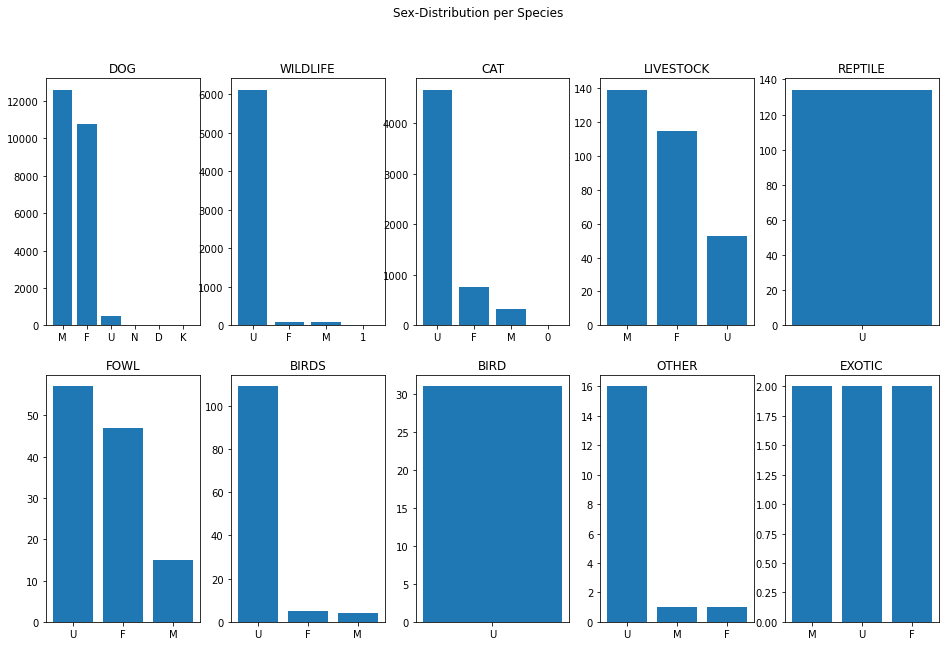

In [16]:
fig, axs = plt.subplots(2, 5, figsize=(16, 10), sharey=False)

for i in range(len(df['species'].value_counts())):
    spec = df['species'].value_counts().index.to_list()[i]
    axs[math.floor(i/5)][i%5].bar(x=df[df['species'] == spec]['sex'].value_counts().index, height=df[df['species'] == spec]['sex'].value_counts())
    axs[math.floor(i/5)][i%5].set_title((df['species'].value_counts().index.to_list())[i])
    
fig.suptitle('Sex-Distribution per Species')
plt.show()

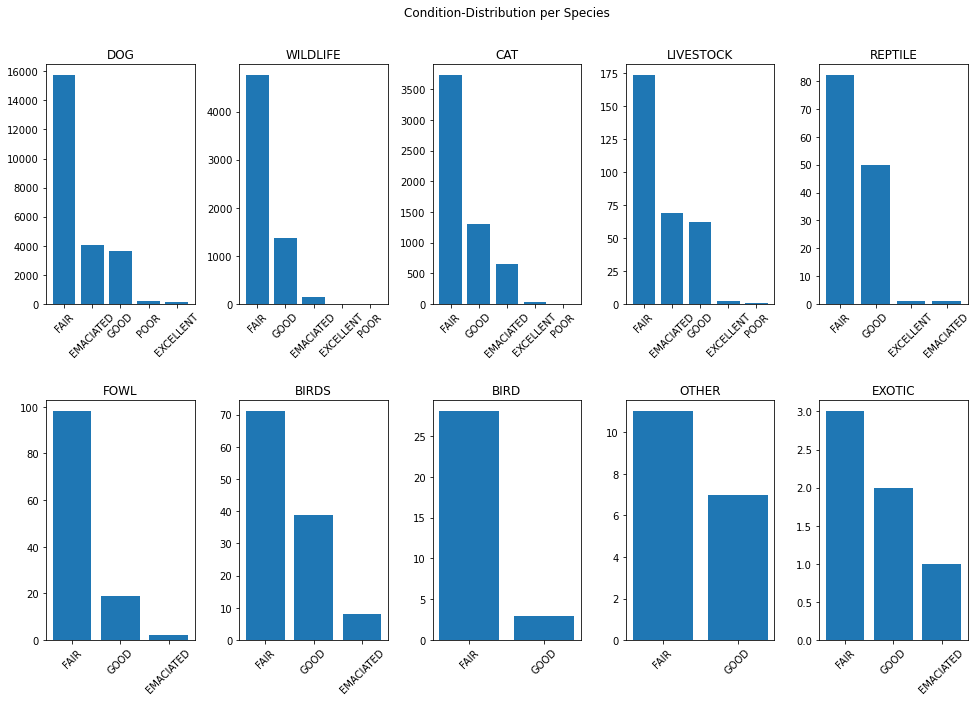

In [17]:
fig, axs = plt.subplots(2, 5, figsize=(16, 10), sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)

for i in range(len(df['species'].value_counts())):
    spec = df['species'].value_counts().index.to_list()[i]
    axs[math.floor(i/5)][i%5].bar(x=df[df['species'] == spec]['condition'].value_counts().index, height=df[df['species'] == spec]['condition'].value_counts())
    axs[math.floor(i/5)][i%5].set_title((df['species'].value_counts().index.to_list())[i])
    for tick in axs[math.floor(i/5)][i%5].get_xticklabels():
        tick.set_rotation(45)
    
fig.suptitle('Condition-Distribution per Species')
plt.show()

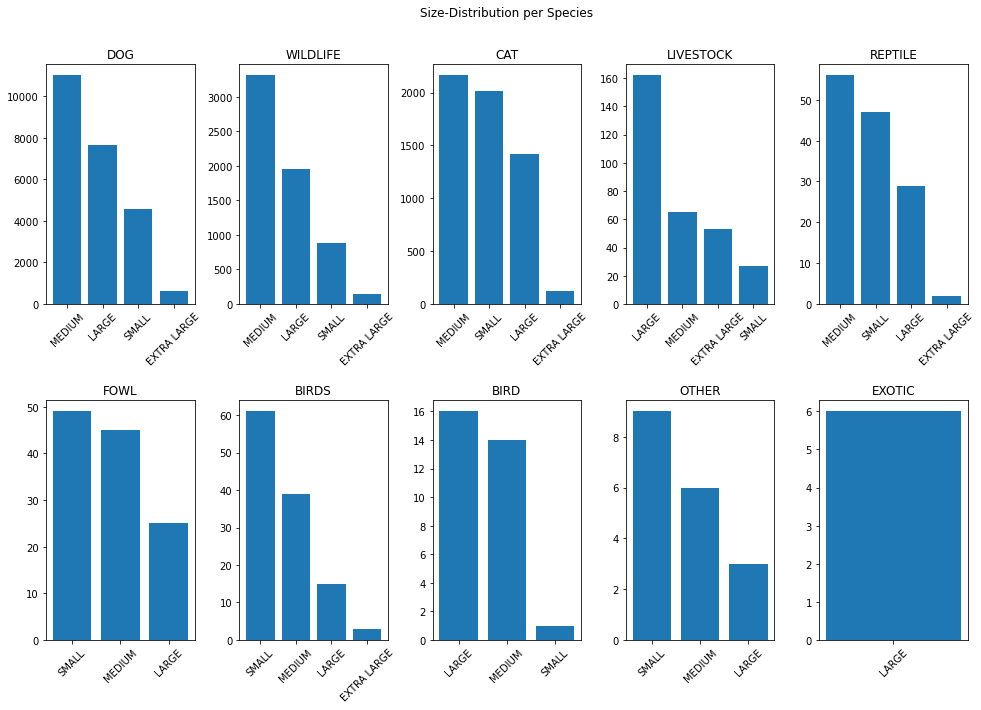

In [18]:
fig, axs = plt.subplots(2, 5, figsize=(16, 10), sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)

for i in range(len(df['species'].value_counts())):
    spec = df['species'].value_counts().index.to_list()[i]
    axs[math.floor(i/5)][i%5].bar(x=df[df['species'] == spec]['size'].value_counts().index, height=df[df['species'] == spec]['size'].value_counts())
    axs[math.floor(i/5)][i%5].set_title((df['species'].value_counts().index.to_list())[i])
    for tick in axs[math.floor(i/5)][i%5].get_xticklabels():
        tick.set_rotation(45)
    
fig.suptitle('Size-Distribution per Species')
plt.show()

In [20]:
dogs_df = df[df['species'] == 'DOG']

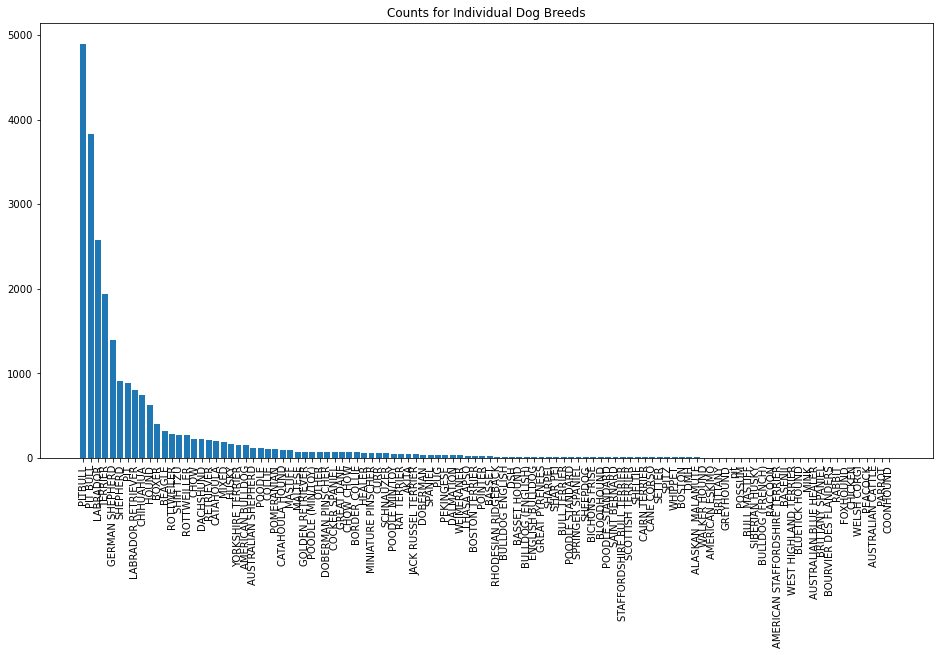

In [23]:
plt.figure(figsize=(16,8))
plt.bar(x=dogs_df['breed'].value_counts().index, height=dogs_df['breed'].value_counts())
plt.xticks(rotation=90)
plt.title('Counts for Individual Dog Breeds')
plt.show()